# Finding minima of functions

At this point you're quite skilled at finding local minima of functions analytically, so now we'll explore how to do so numerically.

## Summary of commands

In this exercise, we will demonstrate the following:
- [`scipy.optimize.fmin(func, x0)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) - Minimize a function `func` given an initial guess `x0`.

This is part of the [SciPy](https://docs.scipy.org/doc/scipy/index.html) package, which we have yet to see in this class!
Whereas NumPy provides the foundational array structure, SciPy contains a lot of helpful routines that operate on such structures, such as [optimization](https://docs.scipy.org/doc/scipy/reference/optimize.html), [statistics](https://docs.scipy.org/doc/scipy/reference/stats.html), [integration](https://docs.scipy.org/doc/scipy/reference/integrate.html), etc.

## Part (a) - Functions of a single variable

Find the minimum of the function $f(x) = 1 - xe^{-2x}$, first analytically and then numerically.

The analytical derivative is 

$$ f'(x) = e^{-2x} (2x - 1) = 0 \implies x^* = \dfrac{1}{2} $$

The numerical solution is interesting. 
You'll notice the function signature is `fmin(func, x0)`, where:
- `x0` is your initial guess, one for each variable.
- `func` is _an actual function_ ("callable"), not simply an array of numbers!
  This means we need to define a new function that returns the appropriate computation on $x$.
  In Python, the syntax for defining your own function is:

```python
def my_func_name(arg1, arg2, ...):
    """ optional docstring to explain purpose, arguments, etc. """
    do something
    return something   # optional
```

- The `def` at the start is required, as is the colon at the end of the first line.
- Just like variables, function names should be descriptive.
- Arguments are optional.
- Docstrings are optional but very nice to have (for others and future you). No need though if the function is very simple.
- Returning a value is generally optional, but here we want to return the expression for the analytical function.

Optimization terminated successfully.
         Current function value: 0.816060
         Iterations: 23
         Function evaluations: 46


array([0.5])

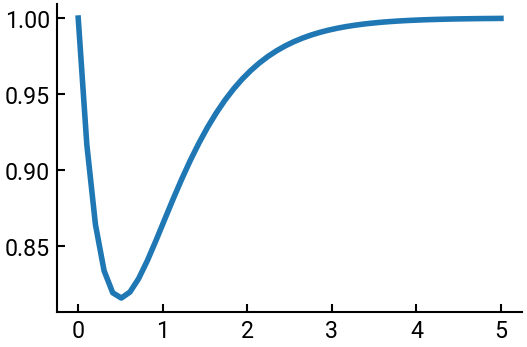

In [1]:
from scipy.optimize import fmin    # take note of syntax when importing specific functions!
import numpy as np
import matplotlib.pyplot as plt

def my_function(x):
    return 1 - x * np.exp(-2 * x)  # that's it!

minimum = fmin(my_function, 0)     # initial guess of 0
display(minimum)                   # many attributes!

# plot it for good measure
x = np.linspace(0, 5)
fig, ax = plt.subplots()
ax.plot(x, my_function(x))
plt.show()

## Part (b) - Functions of several variables

Find the minimum of the function $f(x,y) = \cos(xy) \sin(x)$ over the domain $0 < x < \pi$, $0 < y < \pi$.
Start by plotting the function to approximately locate the minimum and use these approximate values as your initial guess.

```{important}
`fmin()` can be kinda quirky.
If you have two variables `x` and `y`, instead of inputting them as separate arguments, instead group them into a list, i.e., `u = [x, y]`.
Then your `x0` will be a list as well for the initial guesses.
```

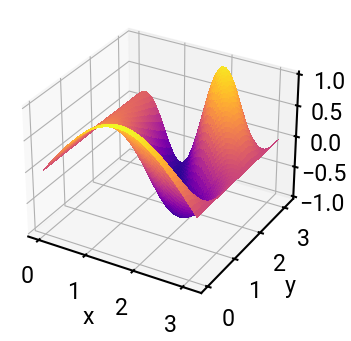

In [2]:
# define the function - note the grouping of x,y into a list u
def new_func(u):
    return np.cos(u[0] * u[1]) * np.sin(u[0])

# plot it
x = np.linspace(0, np.pi)
X, Y = np.meshgrid(x, x)
Z = new_func([X, Y])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma', antialiased=False)
ax.set(xlabel='x', ylabel='y')
plt.show()

In [3]:
# minimum appears to be near (1.5, 2)
minimum = fmin(new_func, [1.5, 2])
display(minimum)

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 25
         Function evaluations: 49


array([1.5708235 , 1.99997996])